# **Random Forest**

Es una evolución del algoritmo de árbol de decisión, ya que, utiliza combinaciones de árboles donde, cada árbol selecciona una clase y posteriormente combina las decisiones que debe tomar con el objetivo de seleccionar una única respuesta.

Se destaca por su uso en bases de datos robustas.

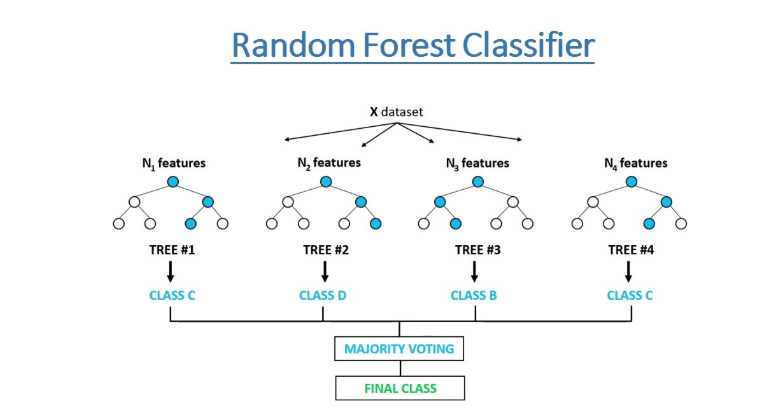

In [22]:
#Numpy:  librería de Python especializada en el cálculo numérico y el análisis de datos.
import numpy as np

#Pandas: librería de Python especializada en el manejo y análisis de estructuras de datos.
import pandas as pd

#Matplotlib: librería de Python especializada en la creación de gráficos en dos dimensiones.
import matplotlib.pyplot as plt

#Seaborn: librería para Python que permite generar fácilmente elegantes gráficos.
import seaborn as sns

#Scikit-learn: biblioteca de Python ampliamente utilizada para el machine learning.
from sklearn.model_selection import train_test_split

In [23]:
from google.colab import drive

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
dataEMG = pd.read_csv('/content/drive/MyDrive/IA/Investigacion /EMG/emg_features_optimized.csv')
dataEMG

,Activity,Mobility,Complexity,Cluster
0,0.000006,0.258057,0.253174,0
1,0.000005,0.237183,0.304932,0
2,0.000004,0.263184,0.277832,0
3,0.000009,0.185425,0.371826,0
4,0.000026,0.096741,0.594727,0
...,...,...,...,...
471996,0.000002,0.409668,0.303955,0
471997,0.000002,0.361816,0.340332,0
471998,0.000002,0.418701,0.293213,0
471999,0.000003,0.343750,0.345459,0


In [26]:
x = dataEMG.drop('Cluster', axis = 1)

In [27]:
y = dataEMG['Cluster']

Librerias A Importar

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1601)

Libreria Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
randomforest = RandomForestClassifier()

In [31]:
randomforest.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
predicciones = randomforest.predict(x_test)

In [33]:
predicciones

array([1, 1, 1, ..., 1, 0, 0])

In [34]:
y_test
x_test

,Activity,Mobility,Complexity
188106,9.387207e-02,0.098389,0.014679
120420,3.576279e-07,0.318115,0.056854
121241,2.410889e-03,0.076538,0.016174
105596,5.960464e-08,0.521484,0.187988
251567,2.920628e-06,0.279541,0.255615
...,...,...,...
165771,4.673004e-05,0.156372,0.176880
5030,7.232666e-02,0.096191,0.011223
347643,2.904892e-03,0.199219,0.037262
72175,1.788139e-07,0.574707,0.119446


Evaluación del algoritmo por medio de la precisión y matriz de confunción

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test,predicciones, digits=4))

              precision    recall  f1-score   support

           0     0.9994    0.9994    0.9994     37671
           1     0.9996    0.9996    0.9996     56730

    accuracy                         0.9995     94401
   macro avg     0.9995    0.9995    0.9995     94401
weighted avg     0.9995    0.9995    0.9995     94401



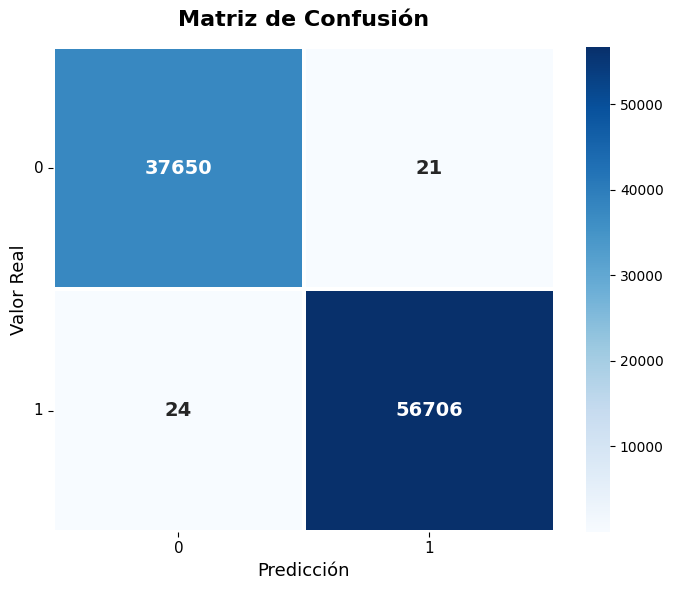

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Calcular matriz de confusión ---
cm = confusion_matrix(y_test, predicciones)
labels = np.unique(y_test)  # etiquetas de clases detectadas

# --- Gráfica ---
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14, "weight": "bold"}, cbar=True, linewidths=1.5)

# --- Estilo ---
plt.title('Matriz de Confusión', fontsize=16, pad=15, weight='bold')
plt.xlabel('Predicción', fontsize=13)
plt.ylabel('Valor Real', fontsize=13)

# Ajustes estéticos
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()

# Mostrar
plt.show()

**Exportacion del modelo**





In [38]:
import joblib

joblib.dump(randomforest, 'randomforest_model.pkl')

['randomforest_model.pkl']

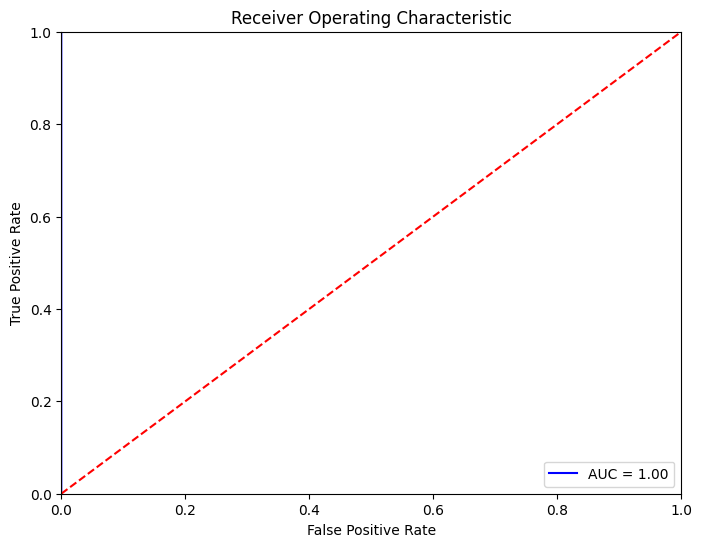

In [39]:
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification
probs = randomforest.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(8, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**import joblib**: Importa la librería joblib, que proporciona herramientas para guardar y cargar objetos Python, incluyendo modelos de aprendizaje automático.


In [40]:
import time
import sys
import psutil
import os
import pickle
import numpy as np

# --- CONFIGURACIÓN ---
N_ITER = 1000  # Número de iteraciones para estimar tiempo promedio

# --- TIEMPO DE INFERENCIA (PROMEDIO Y DESVIACIÓN ESTÁNDAR) ---
tiempos = []
for _ in range(N_ITER):
    start_time = time.perf_counter()
    _ = randomforest.predict(x_test)
    end_time = time.perf_counter()
    tiempos.append(end_time - start_time)

inference_mean = np.mean(tiempos)
inference_std = np.std(tiempos)
print(f"Inference time: {inference_mean:.6f} ± {inference_std:.6f} seconds "
      f"(based on {N_ITER} iterations)")

# --- CONSUMO DE MEMORIA DEL MODELO (MB) ---
model_memory_bytes = sys.getsizeof(randomforest)
model_memory_mb = model_memory_bytes / (1024 ** 2)
print(f"Model memory (approx.): {model_memory_mb:.6f} MB")

# --- USO DE RAM DEL PROCESO (MB) ---
process = psutil.Process(os.getpid())
ram_usage_bytes = process.memory_info().rss
ram_usage_mb = ram_usage_bytes / (1024 ** 2)
print(f"RAM usage: {ram_usage_mb:.6f} MB")

# --- USO DE ESPACIO EN DISCO (MB) ---
model_filename = 'randomforest_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(randomforest, f)
disk_usage_bytes = os.path.getsize(model_filename)
disk_usage_mb = disk_usage_bytes / (1024 ** 2)
os.remove(model_filename)
print(f"Model disk space (exported): {disk_usage_mb:.6f} MB")

Inference time: 0.433779 ± 0.067348 seconds (based on 1000 iterations)
Model memory (approx.): 0.000046 MB
RAM usage: 405.164062 MB
Model disk space (exported): 12.059125 MB
